In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/samerens/Downloads/weather_data.csv')

In [3]:
df

,station_num,temp_ft,year,month,day,fog,rain,snow,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,10590,10.1,2004,1,1,0,0,0,0,0,0,0.0,23.7,8.6
1,10590,8.0,2004,1,2,0,0,0,0,0,0,0.0,13.1,3.2
2,10590,-2.0,2004,1,3,0,0,0,0,0,0,0.0,3.2,-5.8
3,10590,1.3,2004,1,4,0,0,0,0,0,0,0.0,3.2,-2.0
4,10590,0.4,2004,1,5,0,0,0,0,0,0,0.0,0.0,-4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531152,350850,-14.2,2008,12,26,0,0,0,0,0,0,0.0,-3.3,-21.3
42531153,350850,-4.6,2008,12,28,1,0,0,0,0,0,0.0,8.6,0.0
42531154,350850,6.8,2008,12,29,1,0,0,0,0,0,0.0,15.8,0.0
42531155,350850,0.6,2008,12,30,0,0,0,0,0,0,0.0,6.8,-3.8


In [4]:
sum(df['tornado'])

579

In [5]:
df['tornado'].sum()

579

In [6]:
import sklearn

In [22]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import accuracy_score

In [11]:
sorted(df['year'].unique())

[2000,
 2002,
 2003,
 2004,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [14]:
test_df = df[df['year'] >= 2017]

In [13]:
train_df = df[df['year'] < 2017]

In [15]:
train_x = train_df.drop('tornado', axis = 1)

In [16]:
train_y = train_df['tornado']

In [17]:
test_x = test_df.drop('tornado', axis = 1)

In [18]:
test_y = test_df['tornado']

In [19]:
len(train_df)

35932564

In [20]:
len(test_df)

6598593

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(train_x, train_y)

LogisticRegression()

In [25]:
predict = lr.predict(test_x)

In [26]:
accuracy_score(y_true = test_y, y_pred = predict)

0.9999916648897728

In [27]:
sum(predict)

0

In [31]:
np.unique(predict)

array([0])

In [30]:
import numpy as np

In [33]:
df_groupby = df.groupby(['station_num', 'year']).agg({
    'temp_ft': np.mean,
    'fog': np.sum,
    'rain': np.sum,
    'snow': np.sum,
    'hail': np.sum,
    'tornado': np.sum,
    'precip_in': np.sum,
    'max_temp_frnht': np.max,
    'min_temp_frnht': np.min
}).reset_index()

In [34]:
df_groupby

,station_num,year,temp_ft,fog,rain,snow,hail,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,7018,2011,74.402830,0,0,0,0,0,0.00,116.6,0.0
1,7018,2013,80.800000,0,0,0,0,0,0.00,102.2,0.0
2,7026,2012,83.180000,0,0,0,0,0,0.00,107.6,71.6
3,7026,2014,49.410000,2,0,0,0,0,0.00,84.2,0.0
4,7026,2016,82.212500,2,0,0,0,0,0.00,100.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
152625,999999,2015,60.502795,0,0,0,0,0,9.70,98.6,0.0
152626,999999,2016,64.506811,0,0,0,0,0,50.09,98.8,0.0
152627,999999,2017,55.360366,0,0,0,0,0,43.90,90.3,0.0
152628,999999,2018,46.184356,185,33,1,8,0,0.00,93.0,-18.8


In [39]:
sum(df_groupby['tornado'])

579

In [40]:
df_groupby['tornado'].sum()

579

In [41]:
df_groupby['tornado'].unique()

array([0, 1, 2, 3, 5, 8, 4])

In [42]:
sum(df_groupby['tornado'] == 0)

152096

In [45]:
df_722010 = df_groupby[df_groupby['station_num'] == 722010].drop('station_num', axis = 1).reset_index(drop = True)

In [46]:
df_722010

,year,temp_ft,fog,rain,snow,hail,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,2000,77.600000,146,38,1,49,8,33.20,93.0,0.0
1,2002,78.459403,142,46,0,22,3,42.35,93.0,0.0
2,2003,78.469096,144,37,0,29,1,37.50,93.0,0.0
3,2004,77.523894,141,34,0,22,0,31.19,91.0,0.0
4,2008,78.115476,114,8,0,32,2,37.50,91.9,0.0
5,2009,78.430655,124,8,0,38,0,32.98,96.1,0.0
6,2010,76.221739,135,10,0,25,0,39.56,96.1,0.0
7,2011,78.528107,112,2,0,25,0,38.33,93.0,0.0
8,2012,77.650000,119,5,0,15,0,42.28,90.0,0.0
9,2013,78.547024,120,10,0,14,0,45.90,91.0,0.0


In [47]:
import matplotlib.pyplot as plt

In [48]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

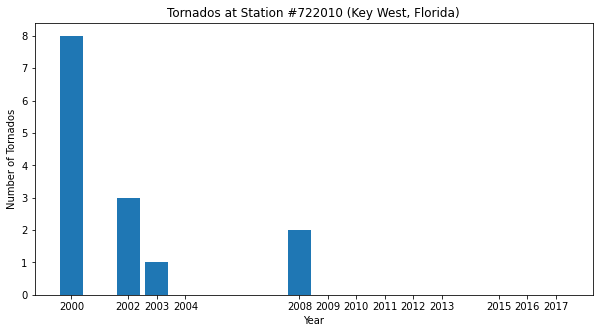

In [67]:
plt.figure(figsize = (10, 5))
plt.bar(x = df_722010['year'], height = df_722010['tornado'])
plt.xticks(ticks = [2000, 2002, 2003, 2004, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017])
plt.xlabel('Year')
plt.ylabel('Number of Tornados')
plt.title('Tornados at Station #722010 (Key West, Florida)')
plt.show()

In [63]:
us_history = pd.read_csv('us_history.csv')

In [64]:
us_history

,USAF,WBAN,STATION NAME,CTRY,ST,RGN,CALL,LAT,LON,ELEV(M),BEGIN,END
0,690014,99999,C STN WHITE SANDS,US,NM,W,NaN,32.350,-106.367,1224.0,19870101,19910611
1,690020,93218,JOLON HUNTER LIGGETT MIL RES,US,CA,W,KHGT,36.000,-121.233,317.0,19640715,19970401
2,690020,99999,JOLON HUNTER LIGGETT MIL RES,US,CA,W,KHGT,36.000,-121.233,317.0,20030702,20030801
3,690070,93217,FRITZSCHE AAF,US,CA,W,KOAR,36.683,-121.767,43.0,19600404,19930831
4,690090,99999,HURLBURT FLD/EXERCIS,US,FL,S,NaN,30.433,-86.717,3.0,20081010,20081017
...,...,...,...,...,...,...,...,...,...,...,...,...
6539,7355,241,VIROQUA MUNICIPAL AIRPORT,US,WI,MW,KY51,43.579,-90.913,394.1,20140731,20220428
6540,7357,182,ELBOW LAKE MUNICIPAL PRIDE OF,US,MN,MW,KY63,45.986,-95.992,367.3,20140731,20220428
6541,7359,240,IONIA COUNTY AIRPORT,US,MI,MW,KY70,42.938,-85.061,249.0,20140731,20220428
6542,51255,445,DEMOPOLIS MUNICIPAL AIRPORT,US,AL,S,KDYA,32.464,-87.954,34.1,20140731,20220428


In [66]:
us_history[us_history['USAF'] == 722010]

,USAF,WBAN,STATION NAME,CTRY,ST,RGN,CALL,LAT,LON,ELEV(M),BEGIN,END
1191,722010,12836,KEY WEST INTERNATIONAL AIRPOR,US,FL,S,KEYW,24.557,-81.755,0.3,19730101,20220428


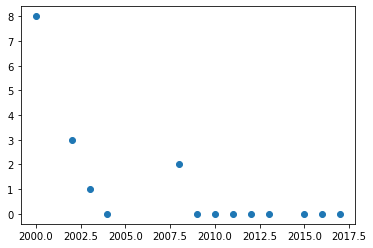

In [68]:
plt.scatter(x = df_722010['year'], y = df_722010['tornado'])

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
mlr = LinearRegression()

In [71]:
train_df = df_722010[df_722010['year'] < 2014]

In [72]:
test_df = df_722010[df_722010['year'] > 2014]

In [73]:
len(train_df)

10

In [74]:
len(test_df)

3

In [75]:
train_df

,year,temp_ft,fog,rain,snow,hail,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,2000,77.600000,146,38,1,49,8,33.20,93.0,0.0
1,2002,78.459403,142,46,0,22,3,42.35,93.0,0.0
2,2003,78.469096,144,37,0,29,1,37.50,93.0,0.0
3,2004,77.523894,141,34,0,22,0,31.19,91.0,0.0
4,2008,78.115476,114,8,0,32,2,37.50,91.9,0.0
5,2009,78.430655,124,8,0,38,0,32.98,96.1,0.0
6,2010,76.221739,135,10,0,25,0,39.56,96.1,0.0
7,2011,78.528107,112,2,0,25,0,38.33,93.0,0.0
8,2012,77.650000,119,5,0,15,0,42.28,90.0,0.0
9,2013,78.547024,120,10,0,14,0,45.90,91.0,0.0


In [76]:
test_df

,year,temp_ft,fog,rain,snow,hail,tornado,precip_in,max_temp_frnht,min_temp_frnht
10,2015,79.877681,126,8,0,46,0,37.30,95.0,0.0
11,2016,78.588439,138,8,0,54,0,37.15,93.0,0.0
12,2017,79.285549,130,7,0,40,0,31.37,93.9,0.0


In [77]:
mlr.fit(train_df.drop('tornado', axis = 1), train_df['tornado'])

LinearRegression()

In [78]:
help(mlr)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [79]:
mlr.coef_

array([ 0.03134651, -1.05698567, -0.17262156,  0.17950925,  4.21231001,
        0.14163782,  0.18181037, -0.04357542,  0.        ])

In [80]:
np.sqrt(np.mean((test_df['tornado'] - mlr.predict(test_df.drop('tornado', axis = 1) ** 2))))

/var/folders/yq/0nx3ssmj049fgh1fl2ll33_80000gn/T/ipykernel_22023/1516959727.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.mean((test_df['tornado'] - mlr.predict(test_df.drop('tornado', axis = 1) ** 2))))


nan

In [87]:
np.sqrt(np.mean((test_df['tornado'] - mlr.predict(test_df.drop('tornado', axis = 1))) ** 2)) # rmse

1.1714865697817136

In [88]:
predict = mlr.predict(test_df.drop('tornado', axis = 1))

In [89]:
predict

array([ 0.15092341,  0.66650315, -1.91053344])

In [91]:
len(train_df.columns)

10

In [92]:
len(mlr.coef_)

9

In [93]:
list(train_df.drop('tornado', axis = 1).columns)

['year',
 'temp_ft',
 'fog',
 'rain',
 'snow',
 'hail',
 'precip_in',
 'max_temp_frnht',
 'min_temp_frnht']

In [94]:
list(mlr.coef_)

[0.03134651351002604,
 -1.0569856723622626,
 -0.17262156375058257,
 0.17950924801691615,
 4.212310008853853,
 0.14163781709133683,
 0.1818103716378593,
 -0.04357541777587863,
 0.0]

In [99]:
pd.DataFrame(dict(zip(list(train_df.drop('tornado', axis = 1).columns), [[coef] for coef in mlr.coef_])))

,year,temp_ft,fog,rain,snow,hail,precip_in,max_temp_frnht,min_temp_frnht
0,0.031347,-1.056986,-0.172622,0.179509,4.21231,0.141638,0.18181,-0.043575,0.0


In [100]:
df_groupby

,station_num,year,temp_ft,fog,rain,snow,hail,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,7018,2011,74.402830,0,0,0,0,0,0.00,116.6,0.0
1,7018,2013,80.800000,0,0,0,0,0,0.00,102.2,0.0
2,7026,2012,83.180000,0,0,0,0,0,0.00,107.6,71.6
3,7026,2014,49.410000,2,0,0,0,0,0.00,84.2,0.0
4,7026,2016,82.212500,2,0,0,0,0,0.00,100.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
152625,999999,2015,60.502795,0,0,0,0,0,9.70,98.6,0.0
152626,999999,2016,64.506811,0,0,0,0,0,50.09,98.8,0.0
152627,999999,2017,55.360366,0,0,0,0,0,43.90,90.3,0.0
152628,999999,2018,46.184356,185,33,1,8,0,0.00,93.0,-18.8


In [102]:
len(df_groupby['station_num'].unique())

15491

In [127]:
coef = []
rmse = []
stations = []

for station in df_groupby['station_num'].unique():
    
    df_station = df_groupby[df_groupby['station_num'] == station].reset_index(drop = True)
    
    if len(df_station) <= 3: continue
    
    train_df = df_station[:-3]
    test_df = df_station[-3:]
    
    mlr = LinearRegression()
    
    mlr.fit(train_df.drop('tornado', axis = 1), train_df['tornado'])
    
    coef.append(mlr.coef_)
    rmse.append(np.sqrt(np.mean((test_df['tornado'] - mlr.predict(test_df.drop('tornado', axis = 1))) ** 2)))
    stations.append(station)

In [116]:
coef

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),


In [117]:
df2 = df_groupby.groupby('station_num').agg(np.sum)

In [121]:
sum(df2['tornado'] == 0)

15055

In [128]:
output_df = pd.DataFrame(coef)

In [124]:
len(df_groupby.drop('tornado', axis = 1).columns)

10

In [129]:
output_df.columns = df_groupby.drop('tornado', axis = 1).columns

In [130]:
output_df['station_num'] = stations

In [131]:
output_df

,station_num,year,temp_ft,fog,rain,snow,hail,precip_in,max_temp_frnht,min_temp_frnht
0,10010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12833,997259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12834,997260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12835,997265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12836,997268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
output_df['max_temp_frnht'].max()

1046565270.6551869

In [145]:
df

,station_num,temp_ft,year,month,day,fog,rain,snow,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,10590,10.1,2004,1,1,0,0,0,0,0,0,0.0,23.7,8.6
1,10590,8.0,2004,1,2,0,0,0,0,0,0,0.0,13.1,3.2
2,10590,-2.0,2004,1,3,0,0,0,0,0,0,0.0,3.2,-5.8
3,10590,1.3,2004,1,4,0,0,0,0,0,0,0.0,3.2,-2.0
4,10590,0.4,2004,1,5,0,0,0,0,0,0,0.0,0.0,-4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531152,350850,-14.2,2008,12,26,0,0,0,0,0,0,0.0,-3.3,-21.3
42531153,350850,-4.6,2008,12,28,1,0,0,0,0,0,0.0,8.6,0.0
42531154,350850,6.8,2008,12,29,1,0,0,0,0,0,0.0,15.8,0.0
42531155,350850,0.6,2008,12,30,0,0,0,0,0,0,0.0,6.8,-3.8


In [146]:
df2 = df.groupby('station_num').agg({'tornado': np.sum}).reset_index()

In [147]:
df2

,station_num,tornado
0,7018,0
1,7026,0
2,7070,0
3,8260,0
4,8268,0
...,...,...
15486,998860,0
15487,999100,0
15488,999110,0
15489,999120,0


In [148]:
sum(df2['tornado'] != 0)

436

In [153]:
stations = list(df2[df2['tornado'] != 0]['station_num'])

In [154]:
stations

[10280,
 10520,
 10590,
 10980,
 10990,
 11390,
 11510,
 12410,
 12900,
 13100,
 13230,
 13840,
 14080,
 14740,
 14825,
 20490,
 21960,
 22590,
 22860,
 24600,
 24960,
 28450,
 30050,
 30170,
 30750,
 30910,
 32610,
 32635,
 33735,
 33770,
 35270,
 35413,
 37243,
 37490,
 37970,
 38915,
 38950,
 39550,
 40300,
 40820,
 40890,
 60300,
 60600,
 60800,
 61040,
 61200,
 61590,
 61700,
 62400,
 63500,
 64500,
 64760,
 64780,
 64900,
 64960,
 65900,
 66140,
 66303,
 66700,
 80290,
 80420,
 80450,
 80850,
 81400,
 81600,
 81840,
 82020,
 83060,
 84490,
 85450,
 101260,
 101720,
 101935,
 102810,
 104160,
 104760,
 106130,
 106162,
 107275,
 111500,
 112310,
 113020,
 121055,
 121150,
 121360,
 121420,
 122950,
 123260,
 123760,
 125000,
 125100,
 125560,
 125600,
 125660,
 126500,
 132725,
 133760,
 150140,
 150830,
 151190,
 151500,
 152470,
 152980,
 155050,
 156150,
 160220,
 160590,
 160760,
 160800,
 161050,
 161240,
 161400,
 161580,
 161700,
 161910,
 162210,
 162310,
 163370,
 163440,

In [155]:
df_tornado = df[df['station_num'] in stations]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [156]:
tornado_counts = dict(zip(df2['station_num'], df2['tornado']))

In [157]:
tornado_counts

{7018: 0,
 7026: 0,
 7070: 0,
 8260: 0,
 8268: 0,
 8414: 0,
 8418: 0,
 10010: 0,
 10014: 0,
 10015: 0,
 10017: 0,
 10020: 0,
 10030: 0,
 10060: 0,
 10070: 0,
 10080: 0,
 10090: 0,
 10100: 0,
 10110: 0,
 10150: 0,
 10160: 0,
 10170: 0,
 10190: 0,
 10200: 0,
 10230: 0,
 10231: 0,
 10240: 0,
 10250: 0,
 10260: 0,
 10270: 0,
 10280: 2,
 10300: 0,
 10330: 0,
 10340: 0,
 10350: 0,
 10360: 0,
 10370: 0,
 10420: 0,
 10430: 0,
 10435: 0,
 10440: 0,
 10450: 0,
 10460: 0,
 10470: 0,
 10490: 0,
 10520: 2,
 10550: 0,
 10580: 0,
 10590: 1,
 10620: 0,
 10650: 0,
 10680: 0,
 10740: 0,
 10750: 0,
 10760: 0,
 10780: 0,
 10820: 0,
 10830: 0,
 10840: 0,
 10860: 0,
 10875: 0,
 10876: 0,
 10877: 0,
 10878: 0,
 10879: 0,
 10880: 0,
 10881: 0,
 10882: 0,
 10883: 0,
 10884: 0,
 10885: 0,
 10886: 0,
 10887: 0,
 10890: 0,
 10920: 0,
 10970: 0,
 10980: 1,
 10990: 2,
 11020: 0,
 11025: 0,
 11030: 0,
 11040: 0,
 11050: 0,
 11060: 0,
 11070: 0,
 11080: 0,
 11100: 0,
 11120: 0,
 11130: 0,
 11133: 0,
 11140: 0,
 11150

In [159]:
df['tornados'] = df['station_num'].apply(lambda station: tornado_counts[station])

In [160]:
df

,station_num,temp_ft,year,month,day,fog,rain,snow,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht,tornados
0,10590,10.1,2004,1,1,0,0,0,0,0,0,0.0,23.7,8.6,1
1,10590,8.0,2004,1,2,0,0,0,0,0,0,0.0,13.1,3.2,1
2,10590,-2.0,2004,1,3,0,0,0,0,0,0,0.0,3.2,-5.8,1
3,10590,1.3,2004,1,4,0,0,0,0,0,0,0.0,3.2,-2.0,1
4,10590,0.4,2004,1,5,0,0,0,0,0,0,0.0,0.0,-4.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531152,350850,-14.2,2008,12,26,0,0,0,0,0,0,0.0,-3.3,-21.3,0
42531153,350850,-4.6,2008,12,28,1,0,0,0,0,0,0.0,8.6,0.0,0
42531154,350850,6.8,2008,12,29,1,0,0,0,0,0,0.0,15.8,0.0,0
42531155,350850,0.6,2008,12,30,0,0,0,0,0,0,0.0,6.8,-3.8,0


In [161]:
df_tornado = df[df['tornados'] > 0]

In [162]:
df_tornado

,station_num,temp_ft,year,month,day,fog,rain,snow,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht,tornados
0,10590,10.1,2004,1,1,0,0,0,0,0,0,0.0,23.7,8.6,1
1,10590,8.0,2004,1,2,0,0,0,0,0,0,0.0,13.1,3.2,1
2,10590,-2.0,2004,1,3,0,0,0,0,0,0,0.0,3.2,-5.8,1
3,10590,1.3,2004,1,4,0,0,0,0,0,0,0.0,3.2,-2.0,1
4,10590,0.4,2004,1,5,0,0,0,0,0,0,0.0,0.0,-4.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530027,22590,14.5,2008,12,26,1,0,0,0,0,0,0.0,0.0,10.4,1
42530028,22590,23.4,2008,12,27,0,0,0,0,0,0,0.0,33.8,14.0,1
42530029,22590,8.7,2008,12,29,0,0,0,0,0,0,0.0,17.6,5.0,1
42530030,22590,10.9,2008,12,30,0,0,0,0,0,0,0.0,0.0,5.0,1


In [163]:
df_tornado.drop('tornados', axis = 1, inplace = True)

/var/folders/yq/0nx3ssmj049fgh1fl2ll33_80000gn/T/ipykernel_22023/3411804397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tornado.drop('tornados', axis = 1, inplace = True)


In [164]:
df_tornado

,station_num,temp_ft,year,month,day,fog,rain,snow,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,10590,10.1,2004,1,1,0,0,0,0,0,0,0.0,23.7,8.6
1,10590,8.0,2004,1,2,0,0,0,0,0,0,0.0,13.1,3.2
2,10590,-2.0,2004,1,3,0,0,0,0,0,0,0.0,3.2,-5.8
3,10590,1.3,2004,1,4,0,0,0,0,0,0,0.0,3.2,-2.0
4,10590,0.4,2004,1,5,0,0,0,0,0,0,0.0,0.0,-4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530027,22590,14.5,2008,12,26,1,0,0,0,0,0,0.0,0.0,10.4
42530028,22590,23.4,2008,12,27,0,0,0,0,0,0,0.0,33.8,14.0
42530029,22590,8.7,2008,12,29,0,0,0,0,0,0,0.0,17.6,5.0
42530030,22590,10.9,2008,12,30,0,0,0,0,0,0,0.0,0.0,5.0


In [167]:
df_tornado['tornado'].sum()

579

In [168]:
579 / 1729902

0.000334701040868211

In [169]:
df_groupby = df_tornado.groupby(['station_num', 'year']).agg({
    'temp_ft': np.mean,
    'fog': np.sum,
    'rain': np.sum,
    'snow': np.sum,
    'hail': np.sum,
    'thunder': np.sum,
    'tornado': np.sum,
    'precip_in': np.sum,
    'max_temp_frnht': np.sum,
    'min_temp_frnht': np.sum
}).reset_index()

In [170]:
df_groupby

,station_num,year,temp_ft,fog,rain,snow,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht
0,10280,2000,31.220795,284,90,20,0,1,0,21.33,9809.0,7785.6
1,10280,2002,30.477644,280,91,11,0,1,0,16.91,10029.0,7590.8
2,10280,2003,27.914286,293,115,37,0,0,0,18.86,9805.3,6923.8
3,10280,2004,32.078275,289,131,25,1,1,0,16.49,9916.0,7472.9
4,10280,2008,31.933333,303,124,30,1,0,0,11.32,10105.6,8603.6
...,...,...,...,...,...,...,...,...,...,...,...,...
5749,987510,2015,75.131157,172,35,0,27,5,0,84.96,25613.9,20844.6
5750,987510,2016,76.020175,169,13,0,13,5,0,97.90,27044.2,20122.7
5751,987510,2017,75.443454,239,18,0,31,2,0,131.43,26920.4,21404.9
5752,987510,2018,76.005187,197,17,0,26,2,0,81.38,27151.5,20832.3


In [171]:
sum(df_groupby['tornado']) / len(df_groupby)

0.10062565172054223

In [172]:
max(df_groupby['tornado'])

8

In [173]:
df_groupby['tornado'].unique()

array([0, 1, 2, 3, 5, 8, 4])

In [195]:
coef = []
rmse = []
stations = []

for station in df_groupby['station_num'].unique():
    
    df_station = df_groupby[df_groupby['station_num'] == station].reset_index(drop = True)
    
    if len(df_station) <= 3: continue
    
    train_df = df_station[:-3]
    test_df = df_station[-3:]
    
    mlr = LinearRegression()
    
    mlr.fit(train_df.drop('tornado', axis = 1), train_df['tornado'])
    
    coef.append(mlr.coef_)
    rmse.append(np.sqrt(np.mean((test_df['tornado'] - mlr.predict(test_df.drop('tornado', axis = 1))) ** 2)))
    stations.append(station)

In [196]:
output_df = pd.DataFrame(coef)

In [197]:
output_df.columns = df_groupby.drop('tornado', axis = 1).columns

In [198]:
output_df['station_num'] = stations

In [199]:
output_df

,station_num,year,temp_ft,fog,rain,snow,hail,thunder,precip_in,max_temp_frnht,min_temp_frnht
0,10280,0.040224,-0.203769,0.023822,-0.001955,-1.817314e-02,0.400321,0.357153,0.044047,-0.000352,0.000148
1,10520,-0.028251,0.090161,0.061644,-0.110226,2.493260e-01,-0.105379,1.143168,0.091568,-0.002402,0.002696
2,10590,-0.042000,0.287659,0.018542,-0.014144,-3.576065e-02,0.053723,-0.496497,-0.071777,-0.000157,-0.000385
3,10980,-0.004700,-0.359994,0.002536,-0.070469,-2.651124e-02,0.586109,-0.018020,-0.053668,0.000480,-0.001130
4,10990,-0.184136,-0.213220,-0.012813,-0.102556,3.323323e-01,0.074645,0.110776,0.000000,0.001282,-0.000790
...,...,...,...,...,...,...,...,...,...,...,...
425,961090,-0.031095,-0.513314,0.002537,-0.003486,3.215055e-01,0.017682,-0.071051,-0.002690,0.000162,-0.000050
426,965250,-1.244171,-7.891387,-0.262756,-2.703866,-5.968834e-01,-0.058976,-0.144549,0.278228,0.003261,-0.001704
427,965650,-0.002868,-0.539272,-0.010902,-0.050835,-5.317539e-01,-0.011614,0.075320,0.014430,0.000138,-0.000122
428,966450,0.400999,3.081934,-0.001154,0.268395,2.484124e-14,0.149701,-0.031982,-0.229028,-0.000910,0.001325


In [200]:
output_df.to_csv('tornado_coef.csv', index = False)

In [201]:
output_df.apply(np.mean)

station_num       479112.530233
year                   0.053323
temp_ft               -0.032898
fog                    0.019150
rain                  -0.027021
snow                  -0.696043
hail                  -0.013073
thunder                0.031164
precip_in             -0.021630
max_temp_frnht        -0.000065
min_temp_frnht         0.000161
dtype: float64